# SPOTIFY Pipeline


* DATA SOURCE: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db
* VARIABLES: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
* SPOTIPY: https://spotipy.readthedocs.io/en/latest/

APIs to enrich data with MUSIC AWARENESS: 
* **Google Trends**: https://www.npmjs.com/package/google-trends-api (https://pypi.org/project/pytrends/)
* **YouTube**: https://www.youtube.com/intl/es/yt/dev/api-resources/ (https://developers.google.com/youtube/v3/quickstart/python)

## Audio Features Object

###  KEY : VALUE TYPE : VALUE DESCRIPTION

* **duration_ms	(int)**	The duration of the track in milliseconds.
* **key	(int)**	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* **mode	(int)**	Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **time_signature	(int)**	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **acousticness	(float)**	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
* **danceability	(float)**	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
* **energy	(float)**	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
* **instrumentalness	(float)**	Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **liveness	(float)**	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 
* **loudness	(float)**	The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
* **speechiness	(float)**	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
* **valence	(float)**	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 
* **tempo	(float)**	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

## Previous - Importing Python packages

In [1]:
# importing all needed packages/libraries to work with on Spotify pipeline

# to work with data: dataframes, statistics & regular expressions
import pandas as pd
import numpy as np
import re

# to import and connect external data via API
import json
import requests
#import argparse

# for data viz
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

## REF: Associated Functions

In [2]:
def importing_csv(csv_path):
    df = pd.read_csv(csv_path)
    return df

def raw(df):
    print('shape:',df.shape)
    print('columns:',df.columns)
    print('variables info:')    
    return df.info()

def conversion_ms_to_min(x):
    return x/60000

def tempo_classification(var):
    bins_labels = ['Larghissimo','Grave','Lento','Larghetto','Adagio','Andante','Moderato','Allegro','Vivace','Presto','Prestissimo']
    cutoffs = [0,20,40,60,66,76,108,120,140,168,200,400] 
    df['tempo_clas'] = pd.cut(df[var],cutoffs, labels=bins_labels)
    return df[['tempo','tempo_clas']].head()

def valcount(data, var):
    return df[var].value_counts()

def topN(data,var,n):
    return df[var].value_counts().head(n)

## 1. Raw data

In [3]:
csv_path = './db/SpotifyFeatures.csv'
df = importing_csv(csv_path)

In [4]:
raw(df)

shape: (228159, 18)
columns: Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')
variables info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
genre               228159 non-null object
artist_name         228159 non-null object
track_name          228159 non-null object
track_id            228159 non-null object
popularity          228159 non-null int64
acousticness        228159 non-null float64
danceability        228159 non-null float64
duration_ms         228159 non-null int64
energy              228159 non-null float64
instrumentalness    228159 non-null float64
key                 228159 non-null object
liveness            228159 non-null float64
loudness            228159 non-null float

In [5]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [6]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,228159.000000,228159.000000,228159.000000,2.281590e+05,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,44.209130,0.351200,0.554198,2.366092e+05,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795
std,17.276599,0.351385,0.183949,1.166787e+05,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397
min,0.000000,0.000001,0.056900,1.550900e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,33.000000,0.030900,0.437000,1.862530e+05,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000
50%,47.000000,0.205000,0.570000,2.211730e+05,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000
75%,57.000000,0.689000,0.690000,2.648400e+05,0.793000,0.023400,0.263000,-5.415000,0.109000,138.887000,0.643000
max,100.000000,0.996000,0.987000,5.552917e+06,0.999000,0.999000,1.000000,1.585000,0.967000,239.848000,1.000000


## 2. Preparing data: internal (Database) & external (APIs) - Data integration

In [7]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

## 3. Data cleaning & manipulation

In [8]:
null_cols = df.isnull().sum()
null_cols

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [9]:
df['duration_min']= df.duration_ms.apply(conversion_ms_to_min)
df.drop(columns='duration_ms',inplace=True)

In [10]:
df['key_mode'] = df[['key', 'mode']].apply(lambda x: ' '.join(x), axis=1)

In [11]:
# for tempo, we will associate the bins to the standard classification
df['tempo_clas']=df['tempo']
tempo_classification('tempo')

,tempo,tempo_clas
0,86.001,Andante
1,131.798,Allegro
2,75.126,Adagio
3,76.493,Andante
4,172.935,Presto


In [12]:
cutoffs_table = df.describe()
print(cutoffs_table)

          popularity   acousticness   danceability         energy  \
count  228159.000000  228159.000000  228159.000000  228159.000000   
mean       44.209130       0.351200       0.554198       0.580967   
std        17.276599       0.351385       0.183949       0.260577   
min         0.000000       0.000001       0.056900       0.000020   
25%        33.000000       0.030900       0.437000       0.405000   
50%        47.000000       0.205000       0.570000       0.618000   
75%        57.000000       0.689000       0.690000       0.793000   
max       100.000000       0.996000       0.987000       0.999000   

       instrumentalness       liveness       loudness    speechiness  \
count     228159.000000  228159.000000  228159.000000  228159.000000   
mean           0.137310       0.214638      -9.354658       0.122442   
std            0.292447       0.196977       5.940994       0.186264   
min            0.000000       0.009670     -52.457000       0.022200   
25%            0.0

In [13]:
def bins(var):
    bins_labels = ['Low','Mid','High']
    if cutoffs_table[var]['min'] != cutoffs_table[var]['25%']:
        cutoffs = [cutoffs_table[var]['min'],cutoffs_table[var]['25%'],cutoffs_table[var]['75%'],cutoffs_table[var]['max']]
    else:
        cutoffs = [cutoffs_table[var]['min'],cutoffs_table[var]['50%'],cutoffs_table[var]['75%'],cutoffs_table[var]['max']] 
    df[str(var)+'_labels']= pd.cut(df[var],cutoffs, labels=bins_labels)
    return df.head(5)

In [14]:
music_KPIs_columns = cutoffs_table.columns

In [15]:
music_KPIs_columns

Index(['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'duration_min'],
      dtype='object')

In [16]:
bins('popularity')
bins('acousticness')
bins('danceability')
bins('duration_min')
bins('energy')
bins('instrumentalness')
bins('liveness')
bins('loudness')
bins('speechiness')
bins('valence')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,...,popularity_labels,acousticness_labels,danceability_labels,duration_min_labels,energy_labels,instrumentalness_labels,liveness_labels,loudness_labels,speechiness_labels,valence_labels
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,0.23100,0.000431,C#,...,Low,High,Low,High,Low,Mid,Low,Low,Mid,Low
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,0.20100,0.028000,D#,...,Low,High,Low,Low,Low,High,Mid,Low,Mid,Mid
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,0.47000,0.020400,C,...,Low,High,Low,High,Mid,Mid,High,Mid,Mid,Low
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,0.00605,0.000000,D,...,Low,High,Low,High,Low,NaN,Mid,Low,Mid,Low
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,0.05800,0.146000,D,...,Low,High,Low,High,Low,High,Low,Low,Mid,Low


In [17]:
null_cols = df.isnull().sum()
null_cols

genre                          0
artist_name                    0
track_name                     0
track_id                       0
popularity                     0
acousticness                   0
danceability                   0
energy                         0
instrumentalness               0
key                            0
liveness                       0
loudness                       0
mode                           0
speechiness                    0
tempo                          0
time_signature                 0
valence                        0
duration_min                   0
key_mode                       0
tempo_clas                     0
popularity_labels           3314
acousticness_labels            1
danceability_labels            1
duration_min_labels            1
energy_labels                  2
instrumentalness_labels    78434
liveness_labels                1
loudness_labels                1
speechiness_labels             2
valence_labels                22
dtype: int

In [18]:
df['instrumentalness_labels'].value_counts()

Mid     57060
High    57009
Low     35656
Name: instrumentalness_labels, dtype: int64

In [71]:
# df.where(df['instrumentalness_labels'].isnull())

In [20]:
# top 10 artists
topN(df,'artist_name',10)

Giuseppe Verdi             1394
Giacomo Puccini            1137
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Johann Sebastian Bach       632
Ludwig van Beethoven        596
Hans Zimmer                 559
Gioachino Rossini           491
Name: artist_name, dtype: int64

In [21]:
# top 10 tracks
topN(df,'track_name',10)

Home           111
You             80
Intro           68
Wake Up         67
Stay            65
Closer          63
Without You     61
Forever         60
Smile           60
Run             56
Name: track_name, dtype: int64

In [22]:
df[['genre','artist_name','track_name','popularity','energy_labels','danceability_labels','valence_labels']].sort_values(by='popularity',ascending=False).head(10)

,genre,artist_name,track_name,popularity,energy_labels,danceability_labels,valence_labels
12710,Pop,Ariana Grande,7 rings,100,Low,High,Mid
159005,Dance,Ariana Grande,7 rings,100,Low,High,Mid
12709,Pop,Post Malone,Wow.,99,Mid,High,Mid
12708,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",99,Mid,High,Mid
159004,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",99,Mid,High,Mid
68784,Rap,Post Malone,Wow.,99,Mid,High,Mid
12815,Pop,Daddy Yankee,Con Calma,98,High,High,High
129244,Reggaeton,Daddy Yankee,Con Calma,98,High,High,High
106070,Hip-Hop,Daddy Yankee,Con Calma,98,High,High,High
141602,Indie,Halsey,Without Me,97,Mid,High,Mid


In [24]:
df.time_signature.value_counts()

4/4    198092
3/4     22472
5/4      5126
1/4      2461
0/4         8
Name: time_signature, dtype: int64

In [25]:
df['mode'].value_counts()

Major    147123
Minor     81036
Name: mode, dtype: int64

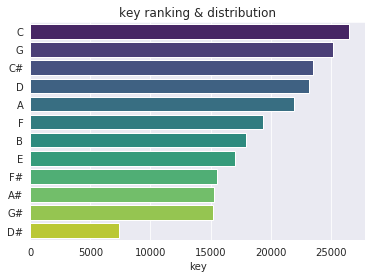

In [26]:
def bars(df, var):
    sns.set_style(style='darkgrid')
    table=df[var].value_counts()
    table_plot=pd.DataFrame(table)
    plt.title(var+' ranking & distribution')
    return sns.barplot(table_plot[var], table_plot.index, palette="viridis")

bars(df,'key')

In [27]:
# checking null data
null_cols = df.isnull().sum()
null_cols

genre                          0
artist_name                    0
track_name                     0
track_id                       0
popularity                     0
acousticness                   0
danceability                   0
energy                         0
instrumentalness               0
key                            0
liveness                       0
loudness                       0
mode                           0
speechiness                    0
tempo                          0
time_signature                 0
valence                        0
duration_min                   0
key_mode                       0
tempo_clas                     0
popularity_labels           3314
acousticness_labels            1
danceability_labels            1
duration_min_labels            1
energy_labels                  2
instrumentalness_labels    78434
liveness_labels                1
loudness_labels                1
speechiness_labels             2
valence_labels                22
dtype: int

In [28]:
df.genre.nunique.value_counts()

AttributeError: 'function' object has no attribute 'value_counts'

In [30]:
df.tempo_clas.value_counts()

Andante        83812
Allegro        49204
Vivace         35818
Moderato       27844
Presto         16801
Adagio         10244
Larghetto       2151
Lento           1278
Prestissimo      922
Grave             85
Larghissimo        0
Name: tempo_clas, dtype: int64

In [31]:
def removing_duplicates(df, columns = []):
    before_removing = len(df)
    df = df.drop_duplicates(columns, keep='last')
    after_removing = len(df)
    removed = before_removing - after_removing
    print('# duplicated removed from df: {}'.format(removed))
    return df

df = removing_duplicates(df, columns = ['track_name','artist_name'])

# duplicated removed from df: 74536


## 4. Analysis & Insights

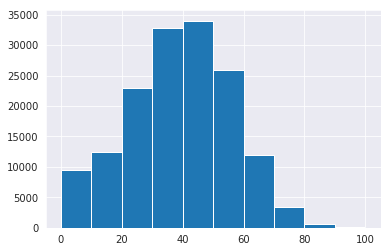

In [32]:
def histo(df, var):
    return df[var].hist()
histo(df,'popularity')

In [33]:
df[['track_name','artist_name','energy','valence','tempo_clas']].sort_values(by='valence',ascending=False).head(10)

,track_name,artist_name,energy,valence,tempo_clas
209634,Irish Washerwoman,Charlton Heston,0.193,1.000,Andante
45452,Hands Up,Ottawan,0.876,0.992,Allegro
173633,It's The Same Old Song - Single Version / Mono,Four Tops,0.844,0.991,Allegro
140355,Let's Do Rock Steady,The Bodysnatchers,0.819,0.991,Allegro
211922,Polka Cwana,Chorus,0.879,0.990,Vivace
138934,He Wants Me Back,Dance Hall Crashers,0.874,0.990,Allegro
171687,Murder,The Selecter,0.691,0.989,Vivace
209629,Flowers Of Edinburgh - Reel,Charlton Heston,0.200,0.989,Andante
168738,Sound Of Bombshell,The Aggrolites,0.583,0.989,Vivace
171364,Pressure Drop (Ska Version),Toots & The Maytals,0.845,0.989,Vivace


In [34]:
df[['track_name','artist_name','energy','valence','tempo_clas']].sort_values(by='valence',ascending=False).head(10)

,track_name,artist_name,energy,valence,tempo_clas
209634,Irish Washerwoman,Charlton Heston,0.193,1.000,Andante
45452,Hands Up,Ottawan,0.876,0.992,Allegro
173633,It's The Same Old Song - Single Version / Mono,Four Tops,0.844,0.991,Allegro
140355,Let's Do Rock Steady,The Bodysnatchers,0.819,0.991,Allegro
211922,Polka Cwana,Chorus,0.879,0.990,Vivace
138934,He Wants Me Back,Dance Hall Crashers,0.874,0.990,Allegro
171687,Murder,The Selecter,0.691,0.989,Vivace
209629,Flowers Of Edinburgh - Reel,Charlton Heston,0.200,0.989,Andante
168738,Sound Of Bombshell,The Aggrolites,0.583,0.989,Vivace
171364,Pressure Drop (Ska Version),Toots & The Maytals,0.845,0.989,Vivace


In [56]:
pop_temp_genre = pd.pivot_table(df, values='popularity', index=['tempo_clas'],
                  columns=["genre"], aggfunc=np.mean)
pop_temp_genre

genre,A Capella,Blues,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
tempo_clas,,,,,,,,,,,,,,,,,,,,,
Grave,9.000000,NaN,NaN,26.000000,19.100000,NaN,NaN,NaN,46.000000,62.000000,...,NaN,57.000000,NaN,NaN,NaN,54.000000,NaN,44.000000,32.200000,31.500000
Lento,18.000000,NaN,49.400000,26.522727,20.938095,55.000000,52.000000,32.800000,43.705882,55.416667,...,66.000000,49.454545,57.333333,31.000000,NaN,60.200000,31.000000,44.722222,33.899563,33.788462
Larghetto,NaN,62.000000,49.666667,32.354633,21.067204,46.200000,72.000000,35.090909,46.148148,58.411765,...,62.750000,50.937500,60.888889,35.812500,29.500000,59.517241,26.250000,46.480000,33.462312,33.977528
Adagio,9.285714,66.444444,49.550725,30.200172,20.906355,44.113537,58.808511,36.089109,45.052632,57.768889,...,67.209302,48.579832,58.462963,34.758621,33.885714,59.298165,29.256410,45.973761,34.225443,35.513986
Andante,9.750000,66.567568,50.155063,28.109471,21.321076,44.245552,56.273438,36.723522,45.691853,58.199281,...,67.198701,49.457348,60.629053,34.912500,37.322523,59.643626,28.822086,46.797305,34.134738,34.926260
Moderato,8.785714,65.848485,50.625323,28.443038,21.403791,43.724064,54.707627,37.700971,45.352078,58.877372,...,65.989501,48.948819,60.641975,34.311069,37.531295,59.556333,27.645570,47.369825,33.904517,34.192982
Allegro,10.161290,67.000000,49.969739,27.723433,21.478528,44.192677,54.506195,37.586325,45.353315,57.934150,...,65.548023,48.556962,61.283237,35.230576,37.534161,59.493506,28.990170,46.738857,33.781448,35.689729
Vivace,8.625000,65.074074,50.253846,29.756250,21.813397,44.246403,54.036320,36.470085,45.185612,58.244048,...,65.522782,48.372849,62.578947,34.026752,38.766398,59.320946,29.266272,46.299363,33.441038,35.913802
Presto,4.444444,62.411765,50.232558,30.400524,22.034591,43.782074,55.000000,36.930233,45.608247,58.291089,...,66.819209,50.853659,59.506944,35.747811,38.548982,60.077698,27.590909,45.659533,33.556701,34.338298


In [36]:
pivot = pd.pivot_table(df, values='danceability', index=["genre"],
                  columns=['popularity_labels'], aggfunc=np.mean)
pivot

popularity_labels,Low,Mid,High
genre,,,
A Capella,0.397500,0.616000,NaN
Blues,NaN,0.663333,0.561058
Children’s Music,0.559308,0.506893,0.550892
Classical,0.307091,0.314756,0.326551
Comedy,0.559341,0.555309,NaN
Country,0.596143,0.579040,0.586705
Dance,0.486944,0.633002,0.654464
Electronic,0.609697,0.624260,0.647659
Folk,0.525333,0.523514,0.525043


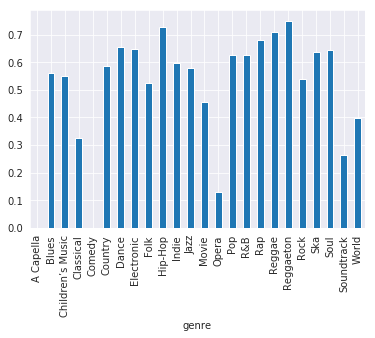

In [37]:
pivot[:]['High'].plot.bar()

In [38]:
pivot2 = pd.pivot_table(df, values='valence', index=["genre"],
                  columns=['energy_labels'], aggfunc=np.mean)
pivot2

energy_labels,Low,Mid,High
genre,,,
A Capella,0.243224,0.580857,0.964000
Blues,0.255397,0.409182,0.454368
Children’s Music,0.289860,0.416347,0.451168
Classical,0.207650,0.354741,0.352607
Comedy,0.514248,0.451067,0.323404
Country,0.378707,0.516293,0.650201
Dance,0.360809,0.496193,0.569011
Electronic,0.275249,0.377947,0.397720
Folk,0.323794,0.495737,0.608359


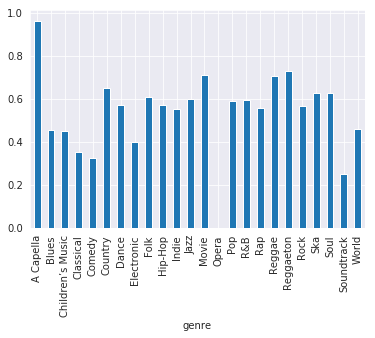

In [39]:
pivot2[:]['High'].plot.bar()

## 5. Reporting & Data Viz

In [40]:
pivot3 = pd.pivot_table(df, values='energy', index=["mode","key"],
                  columns=['genre'], aggfunc=np.mean)
pivot3

genre      A Capella     Blues  Children’s Music  Classical    Comedy  \
mode  key                                                               
Major A     0.292560  0.749000          0.744071   0.166647  0.680649   
      A#    0.496750  0.631000          0.752236   0.134953  0.651311   
      B     0.397686  0.576333          0.747181   0.204580  0.610624   
      C     0.223077  0.657000          0.709819   0.172500  0.618727   
      C#    0.193357  0.721833          0.783600   0.158733  0.685498   
      D     0.301860  0.822625          0.797416   0.187757  0.698573   
      D#    0.196400  0.533667          0.731131   0.124338  0.636242   
      E     0.144560  0.749000          0.742225   0.152721  0.688429   
      F     0.160727  0.730000          0.737142   0.146035  0.668945   
      F#    0.299400  0.773400          0.758452   0.148655  0.692053   
      G     0.273110  0.660462          0.744209   0.179042  0.647914   
      G#    0.299940  0.687889          0.803006   0.191930  0.677407   
Minor A     0.194250  0.697143          0.706667   0.209244  0.619401   
      A#    0.256183  0.523111          0.804423   0.209668  0.645276   
      B     0.196400  0.746222          0.777187   0.268780  0.684608   
      C     0.160650  0.477000          0.744295   0.185936  0.682391   
      C#    0.447000  0.554091          0.779913   0.216654  0.723359   
      D     0.079933  0.621300          0.784721   0.185982  0.635790   
      D#    0.371200  0.709556          0.724368   0.302883  0.753253   
      E     0.160000  0.686467          0.737813   0.232857  0.703236   
      F     0.141000  0.669200          0.779705   0.183718  0.693059   
      F#    0.056700  0.571857          0.757770   0.201623  0.746319   
      G     0.220900  0.524000          0.729455   0.183930  0.696299   
      G#         NaN  0.290000          0.722357   0.269790  0.617940   

genre       Country     Dance  Electronic      Folk   Hip-Hop  ...       Pop  \
mode  key                                                      ...             
Major A    0.625618  0.713716    0.763034  0.506161  0.637517  ...  0.658806   
      A#   0.585391  0.692198    0.745142  0.467561  0.618050  ...  0.588311   
      B    0.615649  0.739153    0.792157  0.455259  0.661218  ...  0.700277   
      C    0.631134  0.711971    0.727059  0.468027  0.642670  ...  0.654365   
      C#   0.647308  0.745116    0.793623  0.452006  0.632900  ...  0.683703   
      D    0.624580  0.729515    0.755271  0.458087  0.652851  ...  0.662362   
      D#   0.566600  0.727650    0.760500  0.400828  0.596854  ...  0.624167   
      E    0.616172  0.726727    0.751840  0.437302  0.652980  ...  0.639210   
      F    0.602478  0.731063    0.736528  0.454760  0.637153  ...  0.623903   
      F#   0.646516  0.715809    0.780225  0.463343  0.649688  ...  0.654981   
      G    0.638340  0.723996    0.753328  0.467826  0.681946  ...  0.662497   
      G#   0.640057  0.688072    0.749044  0.466209  0.633970  ...  0.674524   
Minor A    0.638011  0.723126    0.680426  0.510131  0.648188  ...  0.691730   
      A#   0.708677  0.750000    0.765049  0.520436  0.656297  ...  0.707031   
      B    0.705535  0.751941    0.759263  0.538641  0.657649  ...  0.726136   
      C    0.656911  0.738037    0.699119  0.442713  0.600573  ...  0.706092   
      C#   0.707476  0.737504    0.786541  0.491132  0.648168  ...  0.726265   
      D    0.605792  0.675964    0.706598  0.472037  0.619398  ...  0.719735   
      D#   0.681824  0.745214    0.739713  0.550071  0.659886  ...  0.772297   
      E    0.690137  0.743947    0.710130  0.498726  0.651075  ...  0.696239   
      F    0.722167  0.747791    0.764725  0.486057  0.633867  ...  0.733104   
      F#   0.669372  0.746852    0.752183  0.486807  0.647091  ...  0.665820   
      G    0.709745  0.737614    0.726796  0.404412  0.621615  ...  0.689293   
      G#   0.709220  0.773738    0.757325  0.465131  0.637000  ...  0.694294   

genre           R&B 

In [63]:
def boxplotting(table):
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(15,5))
    return sns.boxplot(data=table)

NameError: name 'pivot6' is not defined

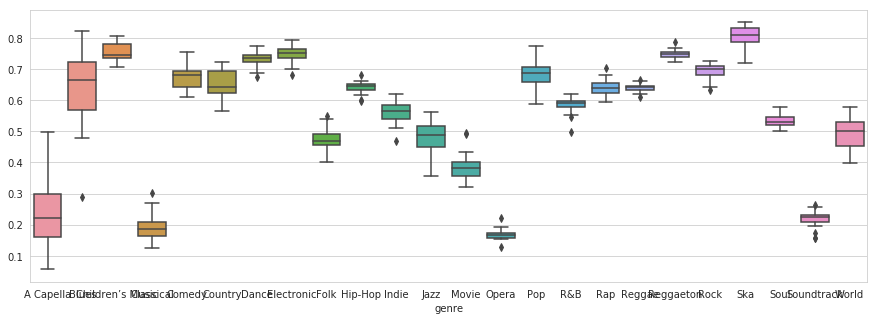

In [58]:
boxplotting(pivot3)

In [42]:
pivot4 = pd.pivot_table(df, values='duration_min', index=["energy_labels","valence_labels"],
                  columns=['popularity_labels'], aggfunc=np.mean)
pivot4

popularity_labels                  Low       Mid      High
energy_labels valence_labels                              
Low           Low             4.541171  4.322545  4.079874
              Mid             3.624679  3.809999  3.608359
              High            3.157188  3.280068  3.325006
Mid           Low             4.668921  4.509262  3.971940
              Mid             4.108346  3.969559  3.743908
              High            3.824581  3.834426  3.632927
High          Low             4.125663  4.534429  4.069860
              Mid             3.569380  3.921461  3.795653
              High            3.412339  3.722751  3.640799

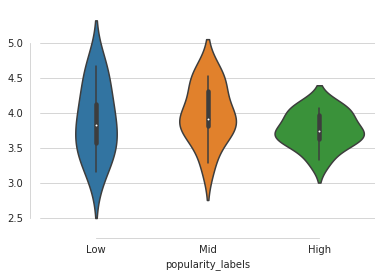

In [43]:
f, ax = plt.subplots()
sns.violinplot(data=pivot4)
sns.despine(offset=10, trim=True);

In [44]:
pivot5 = pd.pivot_table(df, values='tempo', index=["energy_labels","valence_labels"],
                  columns=['popularity_labels'], aggfunc=np.mean)
pivot5

popularity_labels                    Low         Mid        High
energy_labels valence_labels                                    
Low           Low             100.819213  104.309439  112.591318
              Mid             109.247895  112.804236  114.464871
              High            116.350299  117.569364  117.040760
Mid           Low             115.743939  120.598940  121.694229
              Mid             111.470234  118.758735  120.098047
              High            118.006257  119.275255  119.655170
High          Low             113.867578  126.184509  127.182952
              Mid             120.086151  126.624497  126.802073
              High            126.748233  125.932876  125.711463

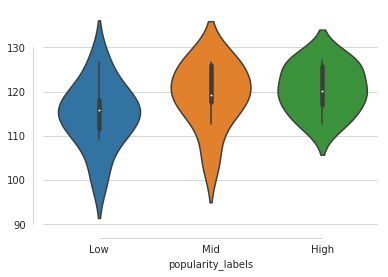

In [45]:
f, ax = plt.subplots()
sns.violinplot(data=pivot5)
sns.despine(offset=10, trim=True);

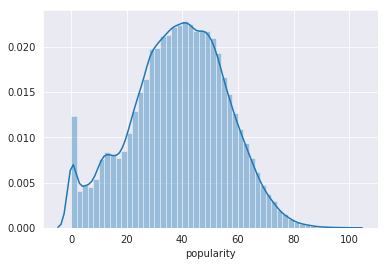

In [46]:
sns.set_style(style='darkgrid')
sns.distplot(df['popularity'],hist=True,kde=True)

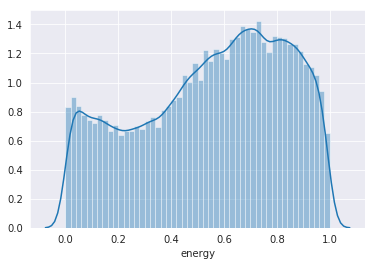

In [47]:
sns.set_style(style='darkgrid')
sns.distplot(df['energy'],hist=True,kde=True)

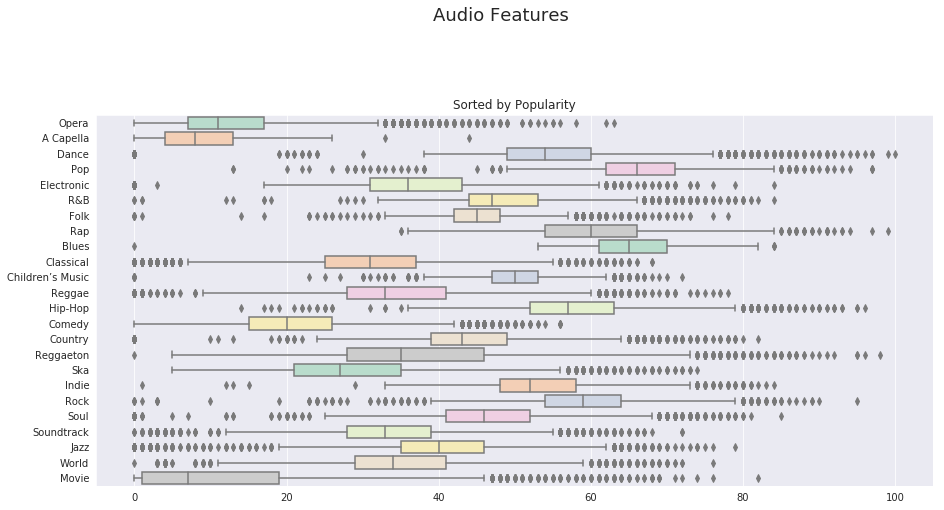

In [48]:
fig = plt.figure(figsize=(15,15))
fig = plt.suptitle('Audio Features', fontsize=18)
ax = plt.subplot(211)
data = df[df.genre.isin(df.groupby('genre').agg([np.sum])['popularity'].sort_values(by='sum', ascending=False).head(10).index.tolist())]
ax = sns.boxplot(x='popularity', y='genre', data=df, palette='Pastel2')
ax = plt.title('Sorted by Popularity')
ax = plt.ylabel(''), plt.xlabel('')

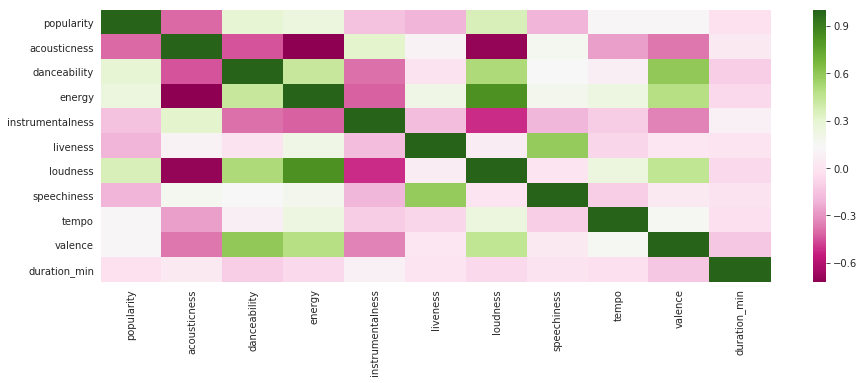

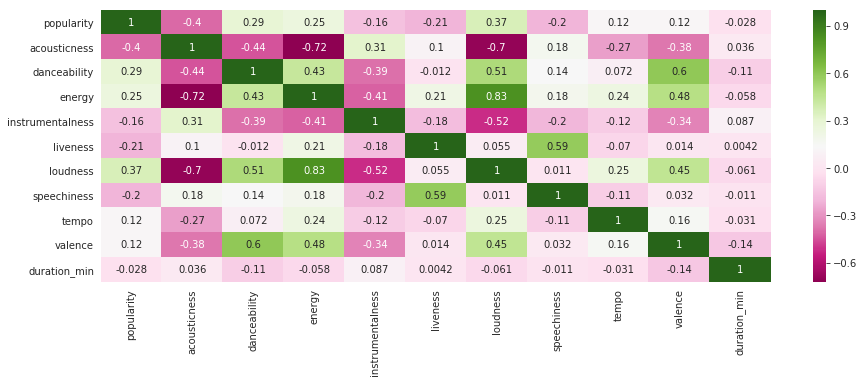

In [49]:
# Heatmap # for color selection: https://matplotlib.org/examples/color/colormaps_reference.html
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),cmap="PiYG")
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),cmap="PiYG",annot=True)

In [89]:
pop_rock_indie = df[df['genre'] == 'Rock']+df[df['genre'] == 'Pop']+df[df['genre'] == 'Indie']
pop_rock_indie.head()

TypeError: Series cannot perform the operation +

In [ ]:
'''#sns.jointplot(data=pop_rock_indie,y='energy',x='liveness',kind='reg')
sns.jointplot(data=rock,y='energy',x='liveness',kind='reg')

sns.set(style="white", color_codes=True)
    tips = sns.load_dataset("tips")
    g = sns.jointplot("total_bill", "tip", data=tips, kind="reg")'''

'''from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(20,20), diagonal='kde')
df.corr(method='pearson', min_periods=1)'''